In [1]:
import numpy  as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):

    d1 = (1/(sigma*np.sqrt(T)))*(np.log(S0/K) + (r + 0.5*sigma**2)*T)
    d2 = d1 - sigma*np.sqrt(T)
    
    c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.exp(-r*T) 
    p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S0
    
    return c, p

# Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455


In [4]:
def GRWPaths(initPrice, mu, sigma, T, numSteps, numPaths, option):
    """
    Computes numPaths random paths for a geometric random walk.
    
    Args:
        mu: is the annual drift, sigma the annual volatility;
        T: is the total length of time for the path (in years).
    Returns:
        random paths for a geometric random walk.
    """   
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [initPrice] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
            
      
    if numSteps == 1:
        x = 'Annual'
    elif numSteps == 12:
        x = 'Monthly'
    elif numSteps == 52:
        x = 'Weekly'
    else:
        x = 'Daily'
    # Plot paths
    plt.figure(figsize = (10,6))
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    plt.title(str(x) + ' ' + str(option)+ ' Option Geometric Random Walk Paths for volatility = ' + str(sigma))
    plt.ylabel('Price')
    plt.xlabel(str(x) + ' Time steps')
    plt.draw()
    return paths

One-step MC price of an European call option is 8.111813363431752
One-step MC price of an European put option is 7.979829453889612
Monthly Multi-step MC price of an European call option is 7.901764490187451
Monthly Multi-step MC price of an European put option is 7.888460114738391
Weekly Multi-step MC price of an European call option is 7.942326471537281
Weekly Multi-step MC price of an European put option is 7.880121116899644
Daily Multi-step MC price of an European call option is 8.041690247723647
Daily Multi-step MC price of an European put option is 7.869220972835184


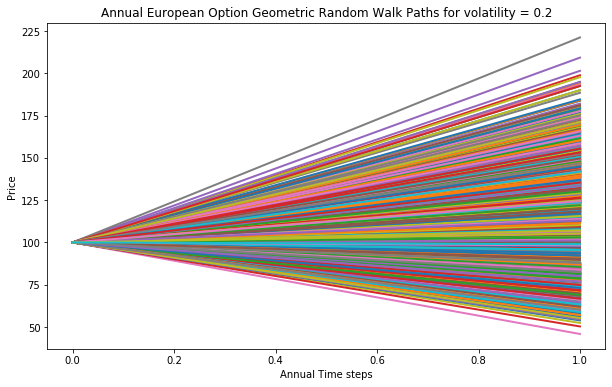

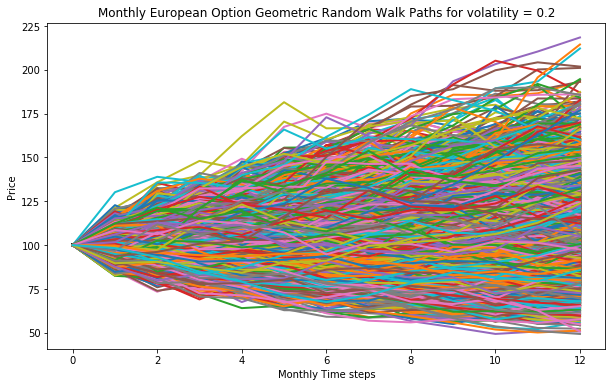

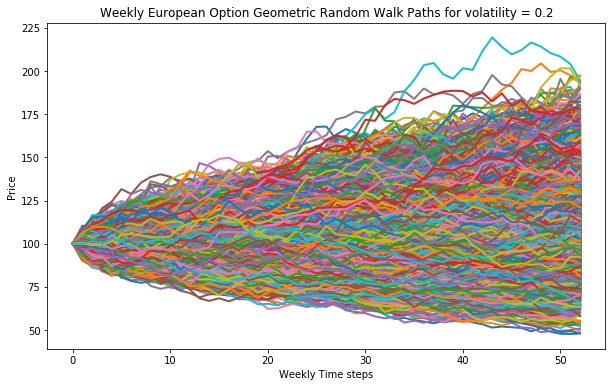

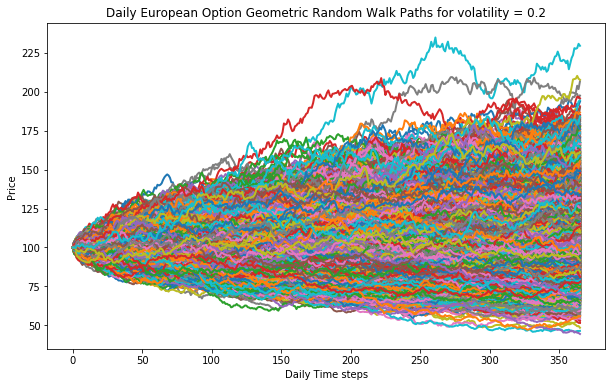

In [5]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):

    y = 'European'
    S = np.array(GRWPaths(S0, mu, sigma, T, numSteps, numPaths, y))
    
    PutPayoffT = np.maximum(K - S[-1,:], 0)
    CallPayoffT = np.maximum(S[-1,:] - K, 0)
    # Discounting the price back to the present value
    p = np.mean(PutPayoffT) * np.exp(-r * T)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    
    return c, p

# numPaths - number of sample paths used in simulations
numPaths = 10000

# one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 

# Define variable numSteps to be the number of steps for multi-step MC
numSteps = [12, 52, 365]
numvar = ['Monthly', 'Weekly', 'Daily']

# multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step = np.zeros(3)
putMC_European_Price_multi_step = np.zeros(3)

for i in range(3):
    callMC_European_Price_multi_step[i], putMC_European_Price_multi_step[i] = MC_european_price(S0, K, T, r, mu, sigma, numSteps[i], numPaths)
    print(numvar[i] + ' Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step[i])) 
    print(numvar[i] + ' Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step[i])) 

Decreased Volatility One-step MC price of an Barrier call option is 6.957175296237993
Decreased Volatility One-step MC price of an Barrier put option is 0.0
Actual Volatility One-step MC price of an Barrier call option is 8.04109112278046
Actual Volatility One-step MC price of an Barrier put option is 0.0
Increased Volatility One-step MC price of an Barrier call option is 8.633129850711084
Increased Volatility One-step MC price of an Barrier put option is 0.0


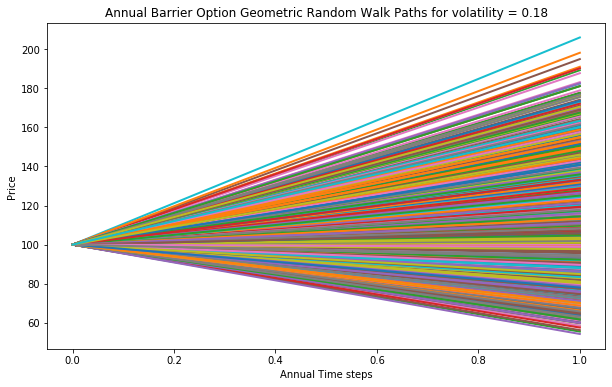

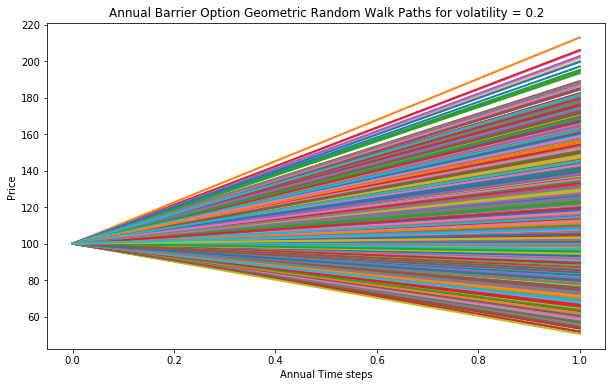

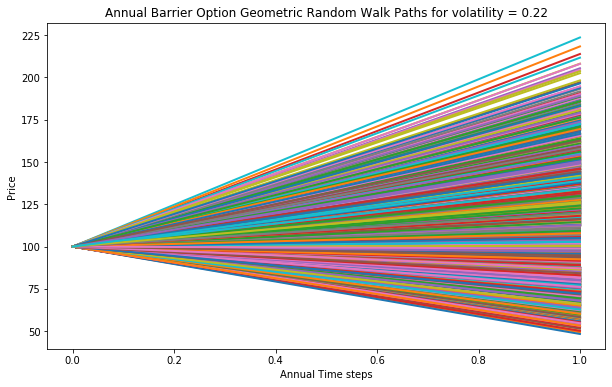

In [6]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):

    y = 'Barrier'
    S = np.array(GRWPaths(S0, mu, sigma, T, numSteps, numPaths, y))
    
    PutPayoffT = np.zeros(numPaths)
    CallPayoffT = np.zeros(numPaths)
    
    for i in range(numPaths):
        if np.amax(S[:,i])<Sb: #If the maximum price for a path is less than the barrier price then the option expires worthless
            CallPayoffT[i] = 0
            PutPayoffT[i] = 0
        else: #If the maximum price for a path is more than the barrier price then the option pays out
            CallPayoffT[i] = np.maximum(S[-1,i] - K, 0)
            PutPayoffT[i] = np.maximum(K - S[-1,i], 0)    
    # Discounting the price back to the present value       
    p = np.mean(PutPayoffT) * np.exp(-r * T)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    
    return c, p

# one-step Monte Carlo pricing procedure for Barrier option
# For 3 sigma values (decreased, actual, increased)
sig = [0.18, 0.2, 0.22]
sigval = ['Decreased', 'Actual', 'Increased']

callMC_Barrier_Knockin_Price_1_step = np.zeros(3)
putMC_Barrier_Knockin_Price_1_step = np.zeros(3)

for i in range(3):
    callMC_Barrier_Knockin_Price_1_step[i], putMC_Barrier_Knockin_Price_1_step[i] = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sig[i], 1, numPaths)
    print(sigval[i] + ' Volatility One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step[i])) 
    print(sigval[i] + ' Volatility One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step[i])) 

Decreased Volatility Monthly Multi-step MC price of an Barrier call option is 7.068249063891969
Decreased Volatility Monthly Multi-step MC price of an Barrier put option is 0.9307396086399214
Decreased Volatility Weekly Multi-step MC price of an Barrier call option is 7.154755683424372
Decreased Volatility Weekly Multi-step MC price of an Barrier put option is 1.3613594819751462
Decreased Volatility Daily Multi-step MC price of an Barrier call option is 7.462006504539187
Decreased Volatility Daily Multi-step MC price of an Barrier put option is 1.5853266579896186
Actual Volatility Monthly Multi-step MC price of an Barrier call option is 7.962305671215558
Actual Volatility Monthly Multi-step MC price of an Barrier put option is 1.3201141824153193
Actual Volatility Weekly Multi-step MC price of an Barrier call option is 7.873952516921842
Actual Volatility Weekly Multi-step MC price of an Barrier put option is 1.7263281107644277
Actual Volatility Daily Multi-step MC price of an Barrier ca

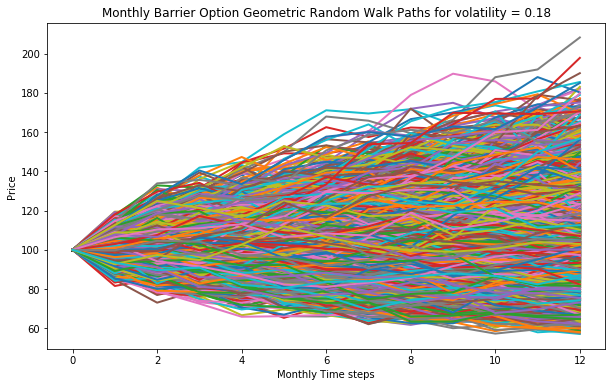

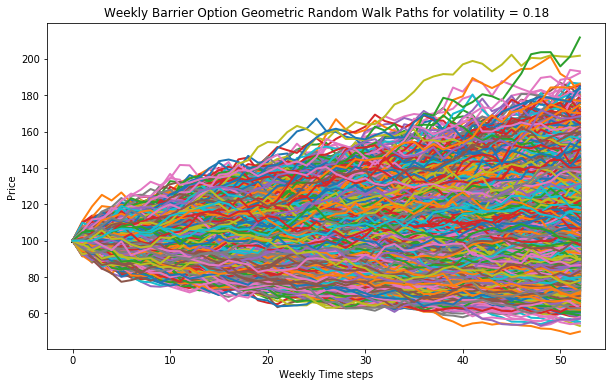

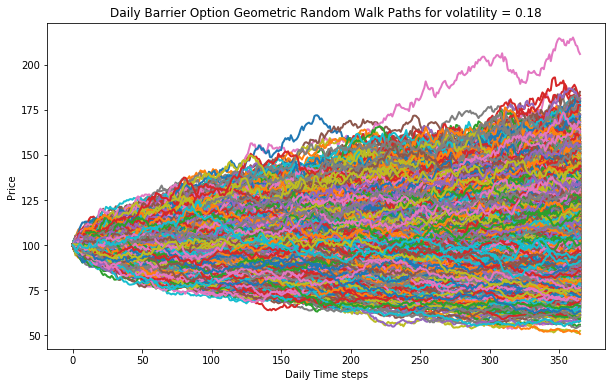

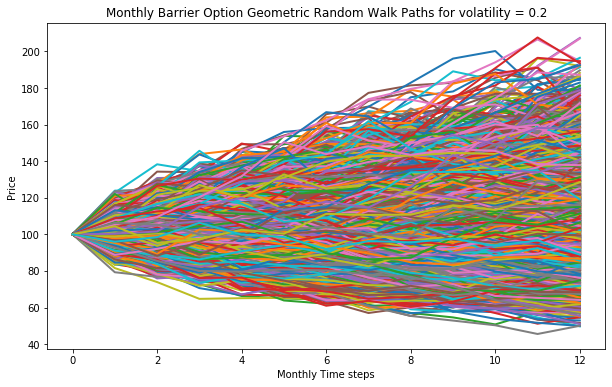

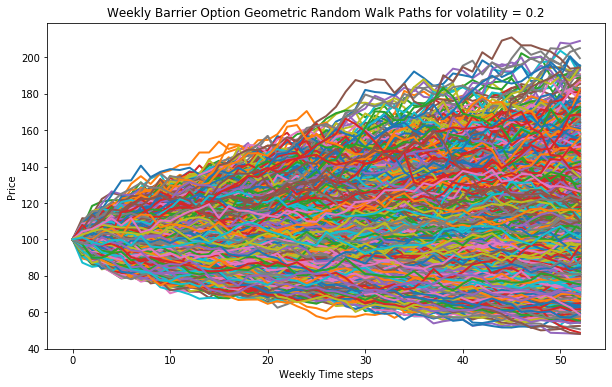

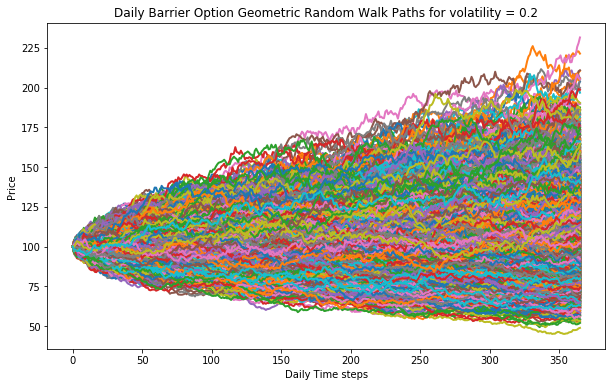

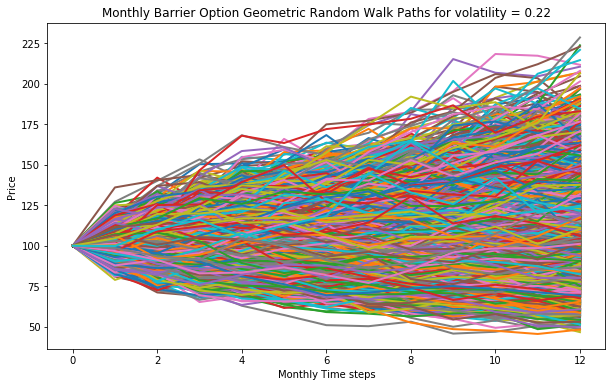

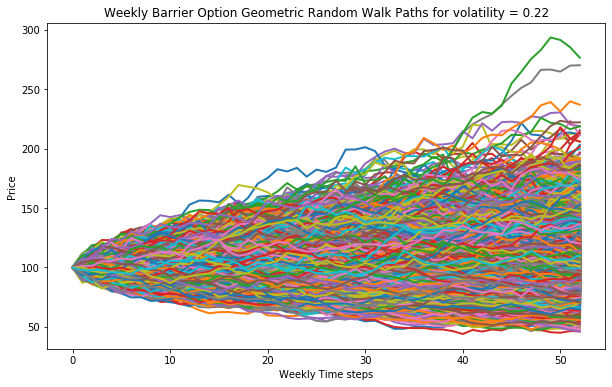

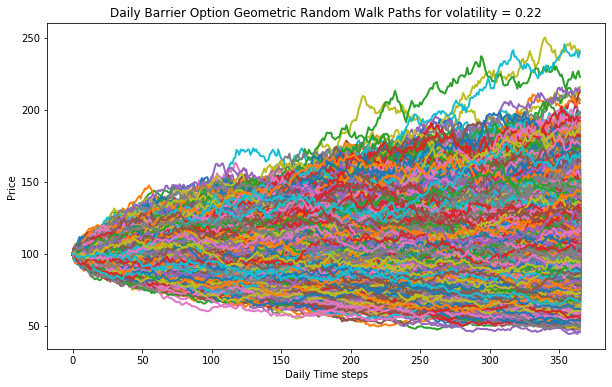

In [7]:
# multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step = np.zeros(9)
putMC_Barrier_Knockin_Price_multi_step = np.zeros(9)

for i in range(3): #For sigma
    for j in range(3): #For time steps
        callMC_Barrier_Knockin_Price_multi_step[3*i+j], putMC_Barrier_Knockin_Price_multi_step[3*i+j] = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sig[i], numSteps[j], numPaths)
        print(sigval[i] + ' Volatility ' + numvar[j] + ' Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step[3*i+j])) 
        print(sigval[i] + ' Volatility ' + numvar[j] + ' Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step[3*i+j]))